<a href="https://colab.research.google.com/github/bharathulaprasad/cs360ml/blob/main/Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Implement the linear regression using the (a) Ordinary Least
#Squares (OLS) Method and (b) Gradient Descent Algorithm
#Dataset: Swedish Auto Insurance dataset. Click here to download
#i) You need to split the dataset into train(60%), validation
#(20%), and test(20%).
#ii) Print the train, validation, and test accuracy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics

#%matplotlib inline
df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls')

# Lets display the top 5 records in the Dataset
print(df.head())

*** No CODEPAGE record, no encoding_override: will use 'ascii'
     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


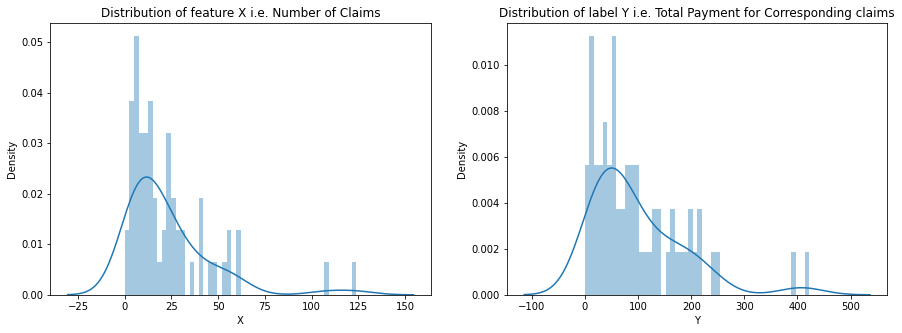

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax=ax2)

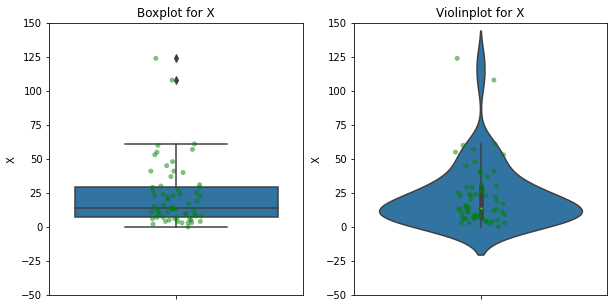

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_ylim(-50,150)
ax1.set_title('Boxplot for X')
sns.boxplot(y='X',data=df,ax=ax1,)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax1,alpha=0.5)

ax2.set_ylim(-50,150)
ax2.set_title('Violinplot for X')
sns.violinplot(y='X',data=df,ax=ax2)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax2,alpha=0.5)

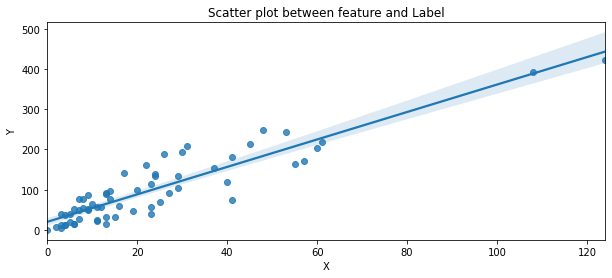

In [ ]:
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df,x='X',y='Y',ax=ax1)


In [ ]:
X = pd.DataFrame(df.X)
y = df.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
y_pred = regr.predict(X)
mse = metrics.mean_squared_error(y_pred,y)
print ('RMSE for Training set : %f' % (np.sqrt(mse)))

RMSE for Training set : 35.365830


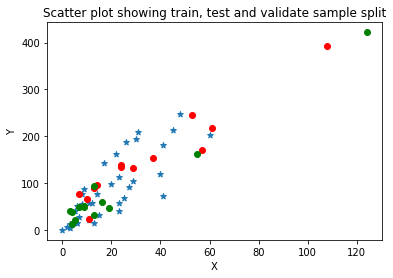

In [ ]:
from sklearn.model_selection import train_test_split

#First to split to train, test and then split train again into validation and train
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot showing train, test and validate sample split')
ax.scatter(X_train,y_train,marker='*',label='Train')
ax.scatter(X_test,y_test,c='red',label='Test')
ax.scatter(X_val,y_val,c='green',label='Validate')

In [ ]:
from sklearn import linear_model
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,y_train)
y_pred = regr_fin.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred,Y_test))
print ('RMSE for Testing set : %f' % (rmse))

RMSE for Testing set : 32.100611


In [ ]:
#ordinary least square method
from sklearn import linear_model
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,y_train)
y_pred = regr_fin.predict(X_val)
rmse = np.sqrt(metrics.mean_squared_error(y_pred,y_val))
print ('RMSE for Testing set : %f' % (rmse))

RMSE for Testing set : 31.590649


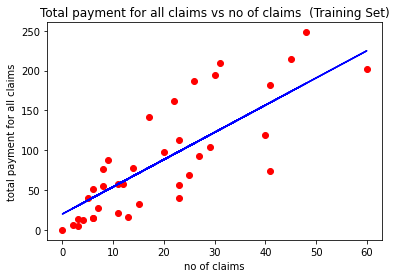

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = 'blue')
plt.title('Total payment for all claims vs no of claims  (Training Set)')
plt.xlabel('no of claims')
plt.ylabel('total payment for all claims')
plt.show()


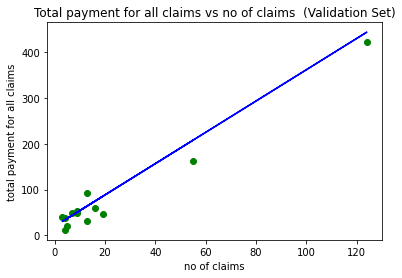

In [ ]:
# Visualising the validation set results
plt.scatter(X_val, y_val, color = 'green')
plt.plot(X_val, regr.predict(X_val), color = 'blue')
plt.title('Total payment for all claims vs no of claims  (Validation Set)')
plt.xlabel('no of claims')
plt.ylabel('total payment for all claims')
plt.show()


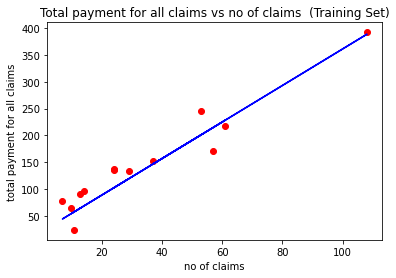

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regr.predict(X_test), color = 'blue')
plt.title('Total payment for all claims vs no of claims  (Training Set)')
plt.xlabel('no of claims')
plt.ylabel('total payment for all claims')
plt.show()


In [ ]:
regr.score(X, y)

0.8333466719794502

*** No CODEPAGE record, no encoding_override: will use 'ascii'
Starting m : 0, Starting b :0
17145.798412698416


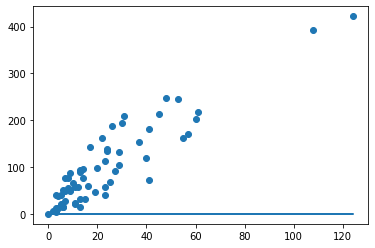

Best m : 3.570271325052689, Best b :12.748974759474258
1277.2881744527947


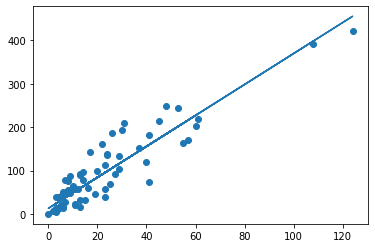

In [ ]:
#using gradient descent method

import pandas as pd
import matplotlib.pyplot as plt

# Calculating the cost i.e how good a line is or distance of each point from the line 
def cost(x_values, y_values, m, b):
	cost = 0
	N = (len(data))
	for i in range(N):
		cost += (( m * x_values[i] + b ) - y_values[i]) ** 2
	print(cost	/ float(N))
		
def gradient_descent(x_values, y_values, m, b, iterations, rate): 
	for i in range(iterations):
		m , b = calculate_gradient_descent(x_values, y_values, m, b, rate) 
	return m , b	

# Differenciating cost function i.e calculating partial derivatives for each
def calculate_gradient_descent(x_values, y_values, m_current , b_current, rate):
	N = float(len(data))
	gradient_m = 0
	gradient_b = 0
	for value in range(len(data)):
		x_value = x_values[value]
		y_value = y_values[value]
		gradient_m += -(2/N) * x_value * (y_value - ((m_current * x_value) + b_current))
		gradient_b += -(2/N) * (y_value - ((m_current * x_value) + b_current))
	updated_m = m_current - (gradient_m * rate)
	updated_b = b_current - (gradient_b * rate)
	return updated_m ,updated_b

# Plot with given x, y, m, b		
def plot(x_values, y_values, m, b):
	y = m*x_values + b
	plt.scatter(x_values,y_values)
	plt.plot(x_values,y)
	plt.show()

# reading from excel file 
data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls')

# X = number of claims
# Y = Total payment for all claims

# Extracting feature and target variable
x_values = data['X']
y_values = data['Y']
#print x_values
#print y_values

#Starting values for slope and intercept 
m = 0
b = 0

# Initialising number of iterations and learning rate
iterations = 10000
rate = 0.0001

# Values and plots for starting m and b
print ('Starting m : {}, Starting b :{}'.format(m,b))
cost(x_values, y_values, m, b)
plot(x_values, y_values, m, b)

best_m , best_b =  gradient_descent(x_values, y_values, m, b, iterations, rate)

# Values and plots for best m and b
print ('Best m : {}, Best b :{}'.format(best_m,best_b))
cost(x_values, y_values, best_m, best_b)
plot(x_values, y_values, best_m, best_b)
# so here we have line equation y=3.570271325052689*X+12.748974759474258

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.05e-25
Time:                        10:49:05   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

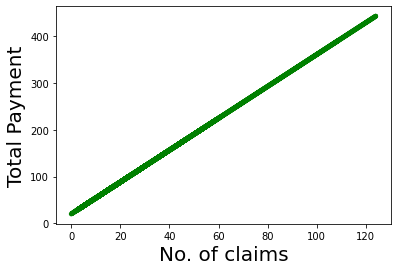

[216.34862228 103.99283102 429.43719193 154.35922021 231.8459728
 247.34332332 103.99283102  53.62644183  38.12909131  65.24945472
 123.36451917  49.7521042   61.37511709]
Coefficient of Determination using ols method =  0.8764487322407846


In [ ]:
#ordinary least square method
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
x_new = sm.add_constant(X)
output = sm.OLS(y, x_new).fit()
print(output.summary())
#based on the output summary we derive y=mx+c
y_pred=3.4138*X+19.9945
fig = plt.plot(X, y_pred, lw = 5, c='green', label='regression line')
plt.xlabel('No. of claims', fontsize =20)
plt.ylabel('Total Payment', fontsize =20)
plt.show()

#Using LinearRegression model again
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#predicting the value
y_pred1= lin_reg.predict(X_test)
print(y_pred1)
#r2_score result
from sklearn.metrics import r2_score, mean_squared_error
r_squared1 = r2_score(y_test, y_pred1)
print("Coefficient of Determination using ols method = ",r_squared1)